## Importing Libraries

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

### Loading Images And Visualizing Them

Change the input size to **[150,150]** while deploying the model as an api endpoint

In [2]:
image_size=[224,224]
train_path='Dataset/Train'
valid_path='Dataset/Test'

In [4]:
folders = glob('Dataset/Train/*')

In [6]:
folders[0]

'Dataset/Train\\Parasite'

### Parasite Images

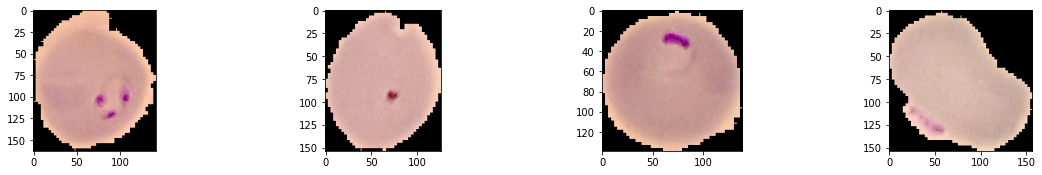

In [22]:
import PIL
rows=5
columns=5
fig=plt.figure(figsize=(25,15))
for j,i in enumerate(range(179,200)):
    try:
        im=PIL.Image.open('Dataset/Train/Parasite/C33P1thinF_IMG_20150619_114756a_cell_{0}.png'.format(i))
    except:
        continue
    im_array=np.asarray(im)
    fig.add_subplot(rows,columns,j+1)
    plt.imshow(im)

### Non Parasite Images

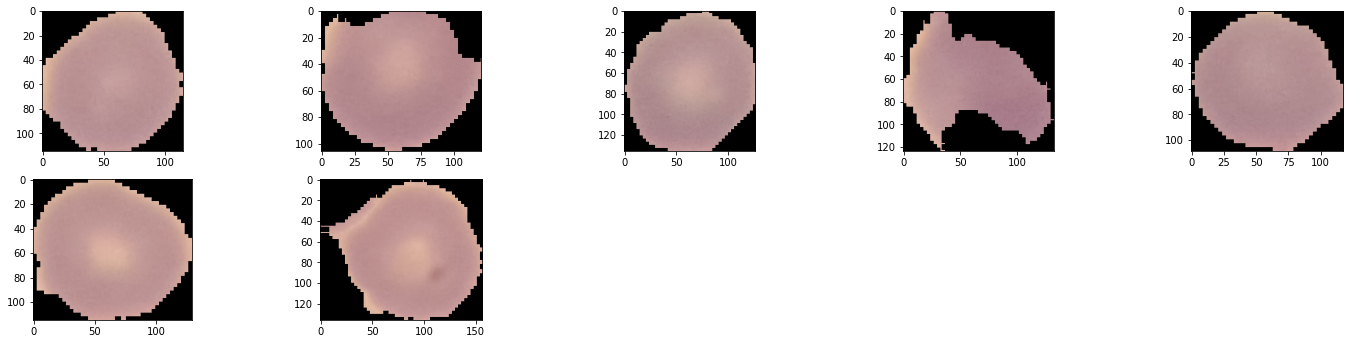

In [32]:
import PIL
rows=5
columns=5
fig=plt.figure(figsize=(25,15))
index=[]
for i in (range(9,100)):
    try:
        im=PIL.Image.open('Dataset/Train/Uninfected/C1_thinF_IMG_20150604_104722_cell_{0}.png'.format(i))
        index.append(i)
    except:
        #print(i)
        continue
for j,i in enumerate(index):
    im=PIL.Image.open('Dataset/Train/Uninfected/C1_thinF_IMG_20150604_104722_cell_{0}.png'.format(i))
    im_array=np.asarray(im)
    fig.add_subplot(rows,columns,j+1)
    plt.imshow(im)

### Transfer Learning Using VGG19 

### Architecture of VGG19
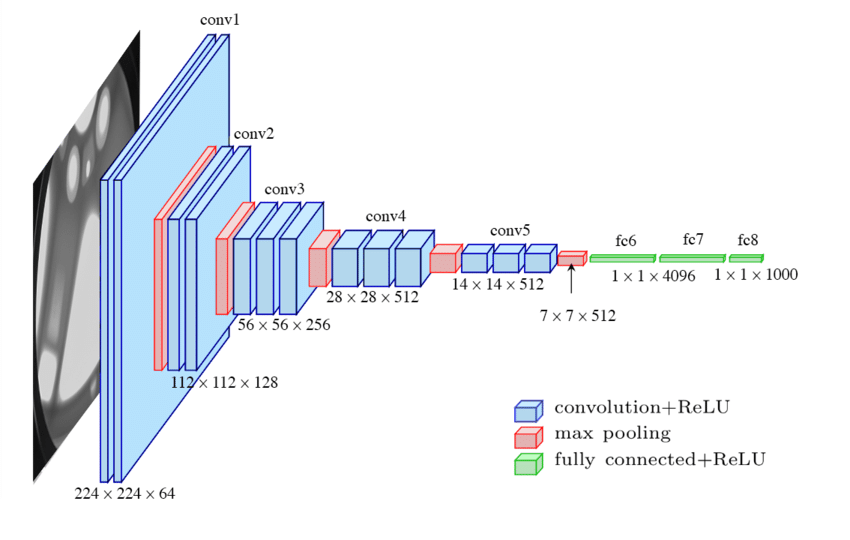

In [35]:
## we don't want the top layer that is explicitely for our Malaria Images Detection
base_convolution = VGG19(input_shape=image_size + [3], weights='imagenet', include_top=False)
#Freeze the layers
for layer in base_convolution.layers:
    layer.trainable=False
x=Flatten()(base_convolution.output)# flatten the outputs of convolution_base
dense=Dense(2,activation='softmax')(x)
model=Model(inputs=base_convolution.input,outputs=dense)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Creating Generators to Flow From Directory

Change the target_size to **(150,150)** while deploying model as an api endpoint.

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [38]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
history=model.fit(training_set,validation_data=test_set,epochs=50,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/50
13/13 [==============================] - 19s 597ms/step - loss: 0.9271 - accuracy: 0.5833 - val_loss: 0.6702 - val_accuracy: 0.5970
Epoch 2/50
13/13 [==============================] - 5s 378ms/step - loss: 0.4409 - accuracy: 0.7985 - val_loss: 0.5607 - val_accuracy: 0.7164
Epoch 3/50
13/13 [==============================] - 5s 386ms/step - loss: 0.3903 - accuracy: 0.8418 - val_loss: 0.4125 - val_accuracy: 0.8284
Epoch 4/50
13/13 [==============================] - 5s 376ms/step - loss: 0.3060 - accuracy: 0.8762 - val_loss: 0.3753 - val_accuracy: 0.8582
Epoch 5/50
13/13 [==============================] - 5s 379ms/step - loss: 0.2769 - accuracy: 0.9068 - val_loss: 0.4817 - val_accuracy: 0.7537
Epoch 6/50
13/13 [==============================] - 5s 377ms/step - loss: 0.2227 - accuracy: 0.9192 - val_loss: 0.3147 - val_accuracy: 0.8582
Epoch 7/50
13/13 [==============================] - 5s 382ms/step - loss: 0.2097 - accuracy: 0.9379 - val_loss: 0.3142 - val_accuracy: 0.8582
Epoch

### Loss And Accuracy Graphs

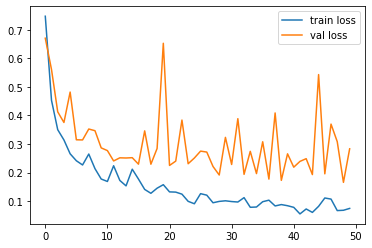

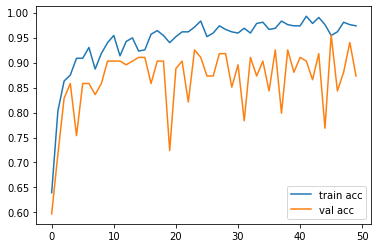

<Figure size 432x288 with 0 Axes>

In [39]:
#Loss Graph
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
#Accuracy Graph
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [105]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Visualizing 1st Conv Layer and Features extracted by it

(1, 224, 224, 64)


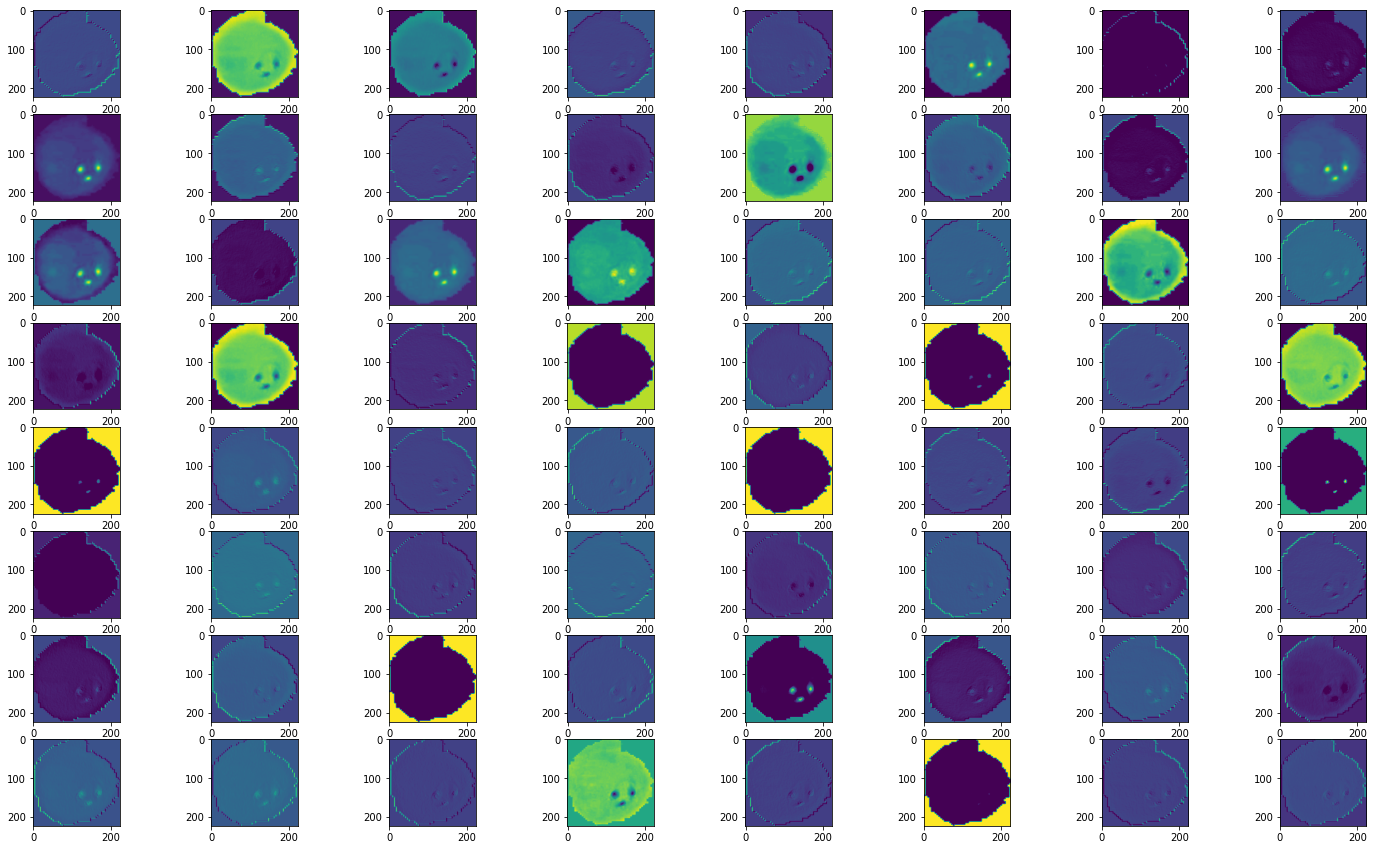

In [111]:
layer_outputs=[layer.output for layer in model.layers[:8]]
activation_model=Model(inputs=model.input,outputs=layer_outputs)
activations=activation_model.predict(im_arr)
first_layer_activation=activations[1]
print(first_layer_activation.shape)
fig=plt.figure(figsize=(25,15))
rows=8
columns=8
for i in range(64):
    fig.add_subplot(rows,columns,i+1)
    plt.imshow(first_layer_activation[0,:,:,i])

### Save your Hardwork

In [40]:
model.save('model_vgg19') # save in the form of assets and variables

### Take a peek at Architecture of our Model

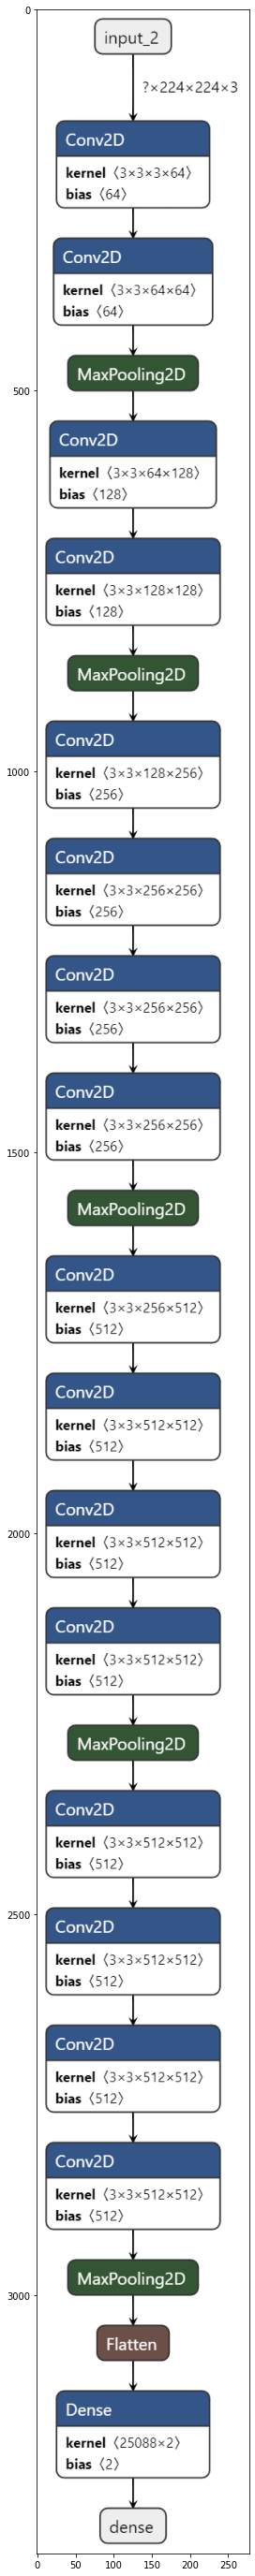

In [53]:
show_arch=PIL.Image.open('model_vgg19.png')
#k=np.asarray(show_arch)
plt.figure(figsize=(100,50))
plt.imshow(np.asarray(show_arch))

### Prediction Time

In [74]:
## Load a random image of Parasite Class
im=PIL.Image.open('Dataset/Train/Parasite/C33P1thinF_IMG_20150619_114756a_cell_179.png')
im=im.resize((224,224))
im_arr=np.asarray(im)
im_arr=im_arr/255.0
im_arr=im_arr.reshape(1,224,224,3)
print(im_arr.shape)
if(np.argmax(model.predict(im_arr),axis=1)):
    print('Unifected with probability of:',format(max(model.predict(im_arr))))
else:
    print('Infected with probability of : ',format(max(model.predict(im_arr).flatten()*100)))

(1, 224, 224, 3)
Infected with probability of :  99.99957275390625


### Important Points From This Notebook

- **Q> Why in Transfer Learning Use only the convolutional Base?**\
    Ans. The representations Learned by convolutional base is more generic and therefore more useable:the feature maps of a convnet are presence maps of generic concepts.
    
- **Q> What is Frezzing of Layers?**\
    Ans. There are many parameters in our conv_base,those should not get updated while training, to do so the layers are freezed.